#Xây dựng đồ thị

In [ ]:
import pandas as pd
import networkx as nx

# Assuming the dataset is provided in a file, let's load it into a DataFrame
# Since the image file cannot be processed, we would need a CSV or Excel file with the same structure mentioned in the text.

# Placeholder for dataset processing (mock example for dataset structure)
data = {
    # "Title": ["Post 1", "Post 2", "Post 3"],
    # "Author": ["Author A", "Author B", "Author C"],
    # "Category": ["Tech", "Health", "Education"],
    # "Comments Count": [2, 3, 1],
    # "Detailed Title": ["Detail 1", "Detail 2", "Detail 3"],
    # "Comments_Post": [
    #     [("Commenter A1", "Reply B1"), ("Commenter A2", "Reply B2")],
    #     [("Commenter B1", "Reply C1"), ("Commenter B2", "Reply D2"), ("Commenter B3", "Reply E3")],
    #     [("Commenter C1", "Reply F1")]
    # ],
}

df = pd.DataFrame(data)

# Constructing a graph from the data
G = nx.DiGraph()

# Adding nodes (authors, commenters, repliers) and their categories
for _, row in df.iterrows():
    G.add_node(row["Author"], category=row["Category"])
    for comment, reply in row["Comments_Post"]:
        G.add_node(comment, category="Commenter")
        G.add_node(reply, category="Replier")
        G.add_edge(row["Author"], comment)  # Author to Commenter
        G.add_edge(comment, reply)         # Commenter to Replier

# Calculating measures
density = nx.density(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

# Preparing results
results = {
    "Density": density,
    "Closeness Centrality": closeness,
    "Betweenness Centrality": betweenness
}

results


#Phân cụm cộng đồng

In [ ]:
from networkx.algorithms.community import louvain_communities, girvan_newman

# Applying Louvain method for community detection
louvain_communities_result = louvain_communities(G)

# Adding community information to nodes as a node attribute (Louvain)
for i, community in enumerate(louvain_communities_result):
    for node in community:
        G.nodes[node]['community_louvain'] = i

# Applying Girvan-Newman method for community detection
girvan_newman_communities = next(girvan_newman(G))  # First split
girvan_newman_mapping = {}
for i, community in enumerate(girvan_newman_communities):
    for node in community:
        girvan_newman_mapping[node] = i

# Adding community information to nodes as a node attribute (Girvan-Newman)
nx.set_node_attributes(G, girvan_newman_mapping, 'community_girvan_newman')

# Collecting node attributes to show communities
node_attributes = {node: G.nodes[node] for node in G.nodes()}
node_attributes


#Phân tích cụm

In [ ]:
from collections import defaultdict

# Initializing a dictionary to store community information
community_users_louvain = defaultdict(list)
community_users_girvan_newman = defaultdict(list)

# Grouping users by community based on Louvain and Girvan-Newman results
for node, attributes in G.nodes(data=True):
    community_users_louvain[attributes['community_louvain']].append(
        {"user": node, "category": attributes.get("category", "Unknown")}
    )
    community_users_girvan_newman[attributes['community_girvan_newman']].append(
        {"user": node, "category": attributes.get("category", "Unknown")}
    )

# Summarizing categories within each community
community_topics_louvain = {
    community: list(set(user['category'] for user in users))
    for community, users in community_users_louvain.items()
}
community_topics_girvan_newman = {
    community: list(set(user['category'] for user in users))
    for community, users in community_users_girvan_newman.items()
}

# Combining results
analysis_result = {
    "Louvain": {
        "Community Users": community_users_louvain,
        "Community Topics": community_topics_louvain,
    },
    "Girvan-Newman": {
        "Community Users": community_users_girvan_newman,
        "Community Topics": community_topics_girvan_newman,
    },
}

import ace_tools as tools; tools.display_dataframe_to_user("Community Analysis", pd.DataFrame(analysis_result))


#Trực quan hóa

In [ ]:
import matplotlib.pyplot as plt

# Assigning colors to Louvain communities for visualization
colors_louvain = [attributes['community_louvain'] for _, attributes in G.nodes(data=True)]

# Drawing the graph with Louvain communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positioning the nodes
nx.draw_networkx_nodes(G, pos, node_color=colors_louvain, cmap=plt.cm.tab20, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title("Graph Visualization - Louvain Communities")
plt.show()

# Assigning colors to Girvan-Newman communities for visualization
colors_girvan_newman = [attributes['community_girvan_newman'] for _, attributes in G.nodes(data=True)]

# Drawing the graph with Girvan-Newman communities
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color=colors_girvan_newman, cmap=plt.cm.tab20, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title("Graph Visualization - Girvan-Newman Communities")
plt.show()


#read graphml

In [1]:
pip install networkx lxml


In [4]:
import networkx as nx

# Read the .graphml file
graph = nx.read_graphml("social_network.graphml")

# Display basic graph information
# print(nx.info(graph))  # This line caused the error
# Instead of nx.info, access properties directly:
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print(f"Is directed: {graph.is_directed()}")
# ... add other properties as needed

# Access nodes and edges
print("Nodes:", list(graph.nodes))
print("Edges:", list(graph.edges))

Number of nodes: 9
Number of edges: 0
Is directed: True
Nodes: ['nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279', 'quan-the-dan-1447', 'jesse-peterson-1050', 'bui-man-1438', 'vo-nhat-vinh-1166', 'dang-thai-hoang-433', 'trinh-phuong-quan-1404', 'ngo-trong-thanh-1006']
Edges: []


Degree Centrality: {'nguyen-minh-hoang-1955': 0.125, 'nguyen-hong-ha-1279': 0.25, 'quan-the-dan-1447': 0.25, 'jesse-peterson-1050': 0.125, 'bui-man-1438': 0.0, 'vo-nhat-vinh-1166': 0.0, 'dang-thai-hoang-433': 0.0, 'trinh-phuong-quan-1404': 0.0, 'ngo-trong-thanh-1006': 0.0}
Betweenness Centrality: {'nguyen-minh-hoang-1955': 0.0, 'nguyen-hong-ha-1279': 0.03571428571428571, 'quan-the-dan-1447': 0.03571428571428571, 'jesse-peterson-1050': 0.0, 'bui-man-1438': 0.0, 'vo-nhat-vinh-1166': 0.0, 'dang-thai-hoang-433': 0.0, 'trinh-phuong-quan-1404': 0.0, 'ngo-trong-thanh-1006': 0.0}
Closeness Centrality: {'nguyen-minh-hoang-1955': 0.0, 'nguyen-hong-ha-1279': 0.125, 'quan-the-dan-1447': 0.16666666666666666, 'jesse-peterson-1050': 0.1875, 'bui-man-1438': 0.0, 'vo-nhat-vinh-1166': 0.0, 'dang-thai-hoang-433': 0.0, 'trinh-phuong-quan-1404': 0.0, 'ngo-trong-thanh-1006': 0.0}


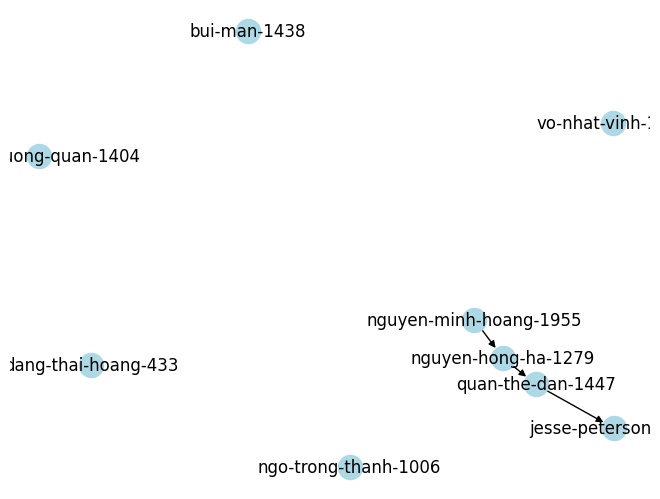

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo mạng lưới ban đầu
graph = nx.DiGraph()
nodes = ['nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279', 'quan-the-dan-1447',
         'jesse-peterson-1050', 'bui-man-1438', 'vo-nhat-vinh-1166',
         'dang-thai-hoang-433', 'trinh-phuong-quan-1404', 'ngo-trong-thanh-1006']
graph.add_nodes_from(nodes)

# Thêm cạnh mẫu
edges = [('nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279'),
         ('nguyen-hong-ha-1279', 'quan-the-dan-1447'),
         ('quan-the-dan-1447', 'jesse-peterson-1050')]
graph.add_edges_from(edges)

# Tính độ đo trung tâm
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)

print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

centrality_df = pd.DataFrame(centrality_data)
# Vẽ đồ thị
nx.draw(graph, with_labels=True, node_color="lightblue", arrows=True)
plt.show()


In [17]:
!pip install ace_tools

Centrality Measures Data:
                     Node  Degree Centrality  Betweenness Centrality  \
0  nguyen-minh-hoang-1955              0.125                0.000000   
1     nguyen-hong-ha-1279              0.250                0.035714   
2       quan-the-dan-1447              0.250                0.035714   
3     jesse-peterson-1050              0.125                0.000000   
4            bui-man-1438              0.000                0.000000   
5       vo-nhat-vinh-1166              0.000                0.000000   
6     dang-thai-hoang-433              0.000                0.000000   
7  trinh-phuong-quan-1404              0.000                0.000000   
8    ngo-trong-thanh-1006              0.000                0.000000   

   Closeness Centrality  
0              0.000000  
1              0.125000  
2              0.166667  
3              0.187500  
4              0.000000  
5              0.000000  
6              0.000000  
7              0.000000  
8              0.00

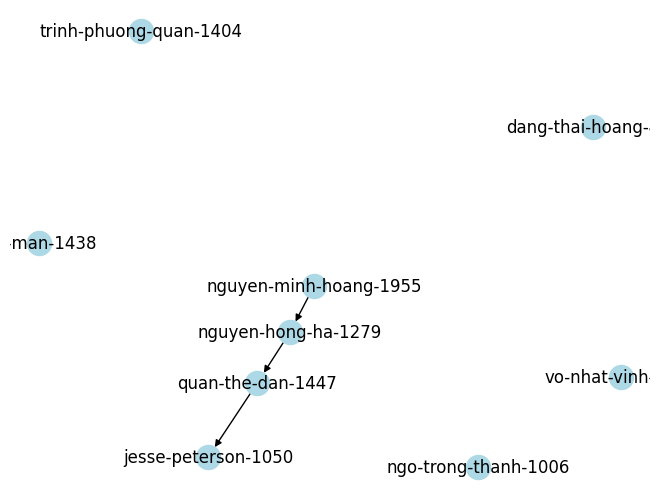

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a directed graph
graph = nx.DiGraph()

# Add nodes
nodes = ['nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279', 'quan-the-dan-1447',
         'jesse-peterson-1050', 'bui-man-1438', 'vo-nhat-vinh-1166',
         'dang-thai-hoang-433', 'trinh-phuong-quan-1404', 'ngo-trong-thanh-1006']
graph.add_nodes_from(nodes)

# Add edges
edges = [('nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279'),
         ('nguyen-hong-ha-1279', 'quan-the-dan-1447'),
         ('quan-the-dan-1447', 'jesse-peterson-1050')]
graph.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)

# Create a DataFrame for centrality measures
centrality_data = {
    "Node": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values())
}

centrality_df = pd.DataFrame(centrality_data)

# Display the DataFrame
print("Centrality Measures Data:")
print(centrality_df)

# Visualize the graph
nx.draw(graph, with_labels=True, node_color="lightblue", arrows=True)
plt.show()


#Thuật toán Louvain

In [6]:
pip install python-louvain networkx


In [10]:
!pip install python-louvain

In [12]:
import networkx as nx
import community as community_louvain  # Import and rename the package
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.karate_club_graph()

# Detect communities using the renamed package
# Change here: Use community_louvain (your alias) to access the function
partition = community_louvain.best_partition(G)

# Display communities
print("Communities:", partition)

# Draw the graph with colors according to the communities
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set3)
plt.show()

AttributeError: module 'community' has no attribute 'best_partition'

#Độ đo cơ bản của mạng

                           Metric                   Value
0                  Average Degree                0.666667
1                   Graph Density                0.041667
2                Network Diameter  Graph is not connected
3             Average Path Length  Graph is not connected
4            Connected Components                       6
5  Average Clustering Coefficient                     0.0


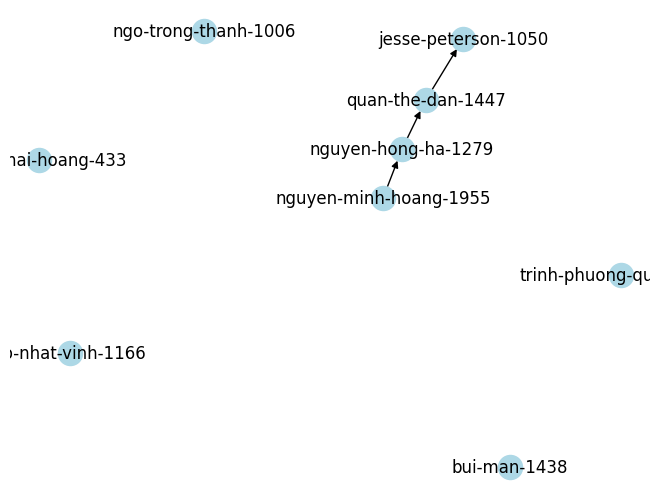

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create a directed graph
graph = nx.DiGraph()

# Add nodes
nodes = ['nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279', 'quan-the-dan-1447',
         'jesse-peterson-1050', 'bui-man-1438', 'vo-nhat-vinh-1166',
         'dang-thai-hoang-433', 'trinh-phuong-quan-1404', 'ngo-trong-thanh-1006']
graph.add_nodes_from(nodes)

# Add edges
edges = [('nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279'),
         ('nguyen-hong-ha-1279', 'quan-the-dan-1447'),
         ('quan-the-dan-1447', 'jesse-peterson-1050')]
graph.add_edges_from(edges)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
closeness_centrality = nx.closeness_centrality(graph)

# Calculate additional graph metrics
average_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()
graph_density = nx.density(graph)

# For undirected version to calculate some metrics
undirected_graph = graph.to_undirected()

if nx.is_connected(undirected_graph):
    network_diameter = nx.diameter(undirected_graph)
    average_path_length = nx.average_shortest_path_length(undirected_graph)
else:
    network_diameter = "Graph is not connected"
    average_path_length = "Graph is not connected"

connected_components = nx.number_connected_components(undirected_graph)
average_clustering_coefficient = nx.average_clustering(undirected_graph)

# Display results
metrics = {
    "Average Degree": average_degree,
    "Graph Density": graph_density,
    "Network Diameter": network_diameter,
    "Average Path Length": average_path_length,
    "Connected Components": connected_components,
    "Average Clustering Coefficient": average_clustering_coefficient
}

metrics_df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
print(metrics_df)

# Visualize the graph
nx.draw(graph, with_labels=True, node_color="lightblue", arrows=True)
plt.show()


#Độ đo trung tâm

In [25]:
import networkx as nx
import pandas as pd

# Tạo đồ thị ban đầu
graph = nx.DiGraph()

# Thêm các nút
nodes = ['nguyen-minh-hoang-1955', 'nguyen-hong-ha-1279', 'quan-the-dan-1447',
         'jesse-peterson-1050', 'bui-man-1438', 'vo-nhat-vinh-1166',
         'dang-thai-hoang-433', 'trinh-phuong-quan-1404', 'ngo-trong-thanh-1006']
graph.add_nodes_from(nodes)

# Thêm cạnh
edges = []  # Không có cạnh trong dữ liệu ban đầu
graph.add_edges_from(edges)

# Kiểm tra tính phù hợp
def is_valid_graph(g):
    """Kiểm tra nếu đồ thị có phù hợp để phân tích."""
    if g.number_of_edges() == 0:
        print("Đồ thị không phù hợp: Không có cạnh.")
        return False
    if nx.is_empty(g):
        print("Đồ thị không phù hợp: Đồ thị trống.")
        return False
    if len(list(nx.weakly_connected_components(g))) > 1:
        print("Đồ thị không phù hợp: Đồ thị không liên thông.")
        return False
    return True

# Kiểm tra và tiếp tục nếu hợp lệ
if is_valid_graph(graph):
    # Tiếp tục tính toán các chỉ số
    print("Đồ thị hợp lệ, tiếp tục phân tích.")

    # Tính toán các chỉ số
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    pagerank = nx.pagerank(graph)
    hits_hub, hits_authority = nx.hits(graph, max_iter=100, tol=1e-08, normalized=True)
    try:
        eigenvector_centrality = {node: 0 for node in graph.nodes()}
        for component in nx.weakly_connected_components(graph):
            subgraph = graph.subgraph(component)
            sub_eigenvector = nx.eigenvector_centrality_numpy(subgraph)
            eigenvector_centrality.update(sub_eigenvector)
    except nx.NetworkXException:
        eigenvector_centrality = {node: 0 for node in graph.nodes()}

    eccentricity = {node: float('inf') for node in graph.nodes()}  # Đồ thị không liên thông

    # Tạo DataFrame
    centrality_data = {
        "Node": list(graph.nodes()),
        "Betweenness Centrality": [betweenness_centrality[node] for node in graph.nodes()],
        "Closeness Centrality": [closeness_centrality.get(node, 0) for node in graph.nodes()],
        "Eigenvector Centrality": [eigenvector_centrality[node] for node in graph.nodes()],
        "PageRank": [pagerank[node] for node in graph.nodes()],
        "HITS Hub": [hits_hub[node] for node in graph.nodes()],
        "HITS Authority": [hits_authority[node] for node in graph.nodes()],
        "Eccentricity": [eccentricity[node] for node in graph.nodes()],
    }
    centrality_df = pd.DataFrame(centrality_data)
    print(centrality_df)
else:
    print("Không thực hiện phân tích vì đồ thị không phù hợp.")


Đồ thị không phù hợp: Không có cạnh.
Không thực hiện phân tích vì đồ thị không phù hợp.
